<a href="https://colab.research.google.com/github/satyapravin/uniswapv3/blob/main/Virtual_and_Real_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['curve.png']))

KeyError: ignored

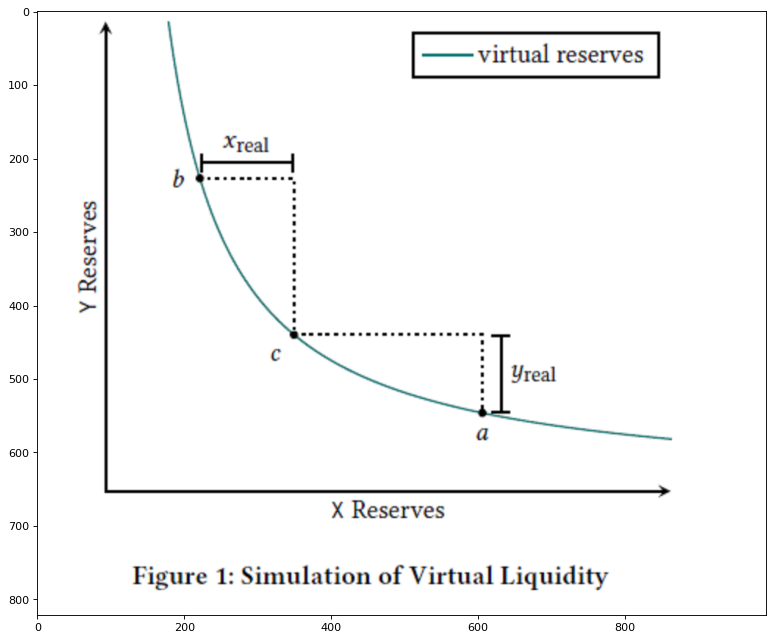

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
plt.imshow(im)
plt.show()

**Real and Virtual Curves**

We know from V2 that $\displaystyle x_c.y_c=k$.

Therefore, price of $\displaystyle x$ token is given by $\displaystyle \frac{y}{x}$.

Let $\displaystyle x_{real}$ and $\displaystyle y_{real}$ be the respective amount of tokens deposited.$

When $\displaystyle x_{real}$ is exhausted we are left with $\displaystyle y$ tokens. Hence price of $\displaystyle x$ token at this point is $\displaystyle P_b=\frac{y_b}{x_b}$.

Similarly if $\displaystyle y_{real}$ is exhausted we are left with $\displaystyle x$ tokens. Hence price of $\displaystyle x$ token at this point is $\displaystyle P_a=\frac{y_a}{x_a}$.

Solving above equations:

$\displaystyle x_b.y_b=k$ 

$\displaystyle k=x_b.x_b.P_b$ 

$\displaystyle {x_b}^2.P_b=k$ 

$\displaystyle \sqrt{k}=x_b.\sqrt{P_b}$ 

Substituting $\displaystyle L=\sqrt{k}$ we get,

$\displaystyle x_b = \frac{L}{\sqrt{P_b}}$ 

Similarly $\displaystyle y_a=L.\sqrt{P_a}$ 

But we know that at position $\displaystyle b$ token $x$ is depleted and at $\displaystyle a$, token $y$ is depleted.

Therefore we get, 

$\displaystyle (x + \frac{L}{\sqrt{P_b}})(y + L\sqrt{P_a})=L^2$


Let us assume current price of ETH is 2000 USDC and K = 1000K. Let us quote in V3 between 1500 and 2500. Then,

$L=1000$ 

$x = \frac{1000}{\sqrt{2000}}$

$x_b = \frac{1000}{\sqrt{2500}}$

$x_{real} =x - x_b$

$y = 1000.\sqrt{2000}$

$y_a = 1000.\sqrt{1500}$

$y_{real}=y - y_a$


**Amount of X and Y reserve increase/decrease as price moves**

$\Delta Y = \Delta \sqrt{P}.L$


$\Delta X= \Delta \frac{1}{\sqrt{P}}.L$

Xreal 22.03589074676998
Yreal 55928.21850646002
Total Capital 99999.99999999997
Amount of additional X when Y is depleted= 32.29017201000087
Amount of additional Y when X is depleted= 49273.74965453629
Value of total capital when Y is depleted= 81489.09413515628
Amount of total capital when X is depleted= 105201.9681609963


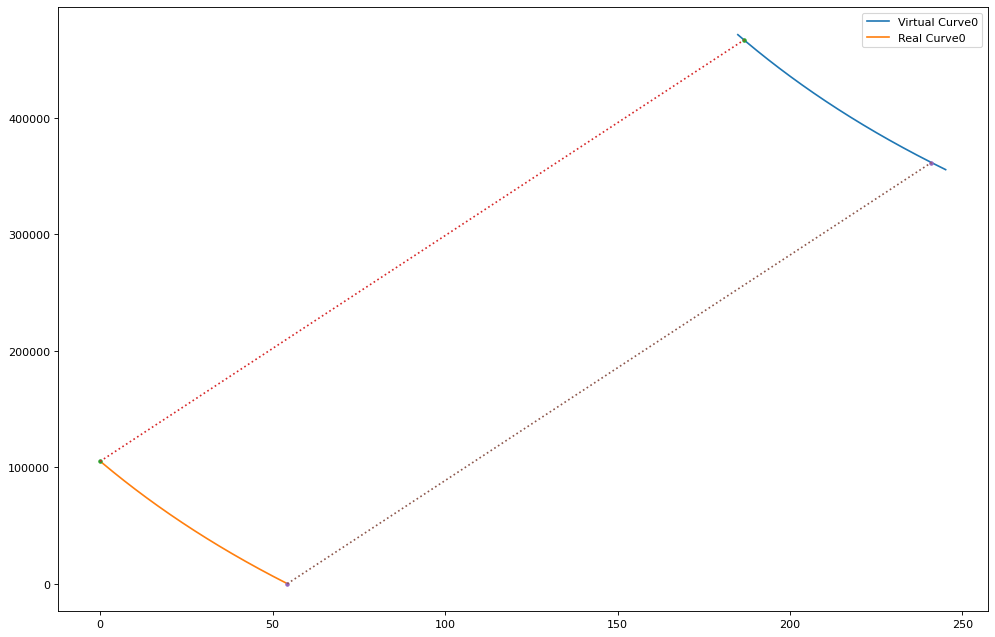

In [ ]:
import numpy as np
import math

def K_from_Yreal(Pa, Pb, Yreal, Price):
  Pa_root = np.sqrt(Pa)
  Pb_root = np.sqrt(Pb)
  P_root = np.sqrt(Price)
  L = Yreal / (P_root - Pa_root)
  K = L**2
  return K

def K_from_Xreal(Pa, Pb, Xreal, Price):
  Pa_root = np.sqrt(Pa)
  Pb_root = np.sqrt(Pb)
  P_root = np.sqrt(Price)
  L = Xreal / (1/P_root - 1/Pb_root)
  K = L**2
  return K

def Alpha_from_Amount(Pa, Pb, CapitalInY, Price):
  Pa_root = np.sqrt(Pa)
  Pb_root = np.sqrt(Pb)
  P_root = np.sqrt(Price)
  alpha = CapitalInY * (Price - P_root * Pb_root)/(Price - 2 * P_root * Pb_root + Pb_root * Pa_root)
  return alpha
  
def K_from_Amount(Pa, Pb, CapitalInY, Price):
  alpha = Alpha_from_Amount(Pa, Pb, CapitalInY, Price)
  return K_from_Yreal(Pa, Pb, CapitalInY - alpha, Price)

def plot_curve_from_amount(Pa, Pb, CapitalInY, Price):
  alpha = Alpha_from_Amount(Pa, Pb, CapitalInY, Price)
  plot_curves_from_Yreal(Pa, Pb, CapitalInY - alpha, Price, 0)

def plot_curves_from_Yreal(Pa, Pb, Yreal, Price, refI):
  K = K_from_Yreal(Pa, Pb, Yreal, Price)
  plot_curves(Pa, Pb, K, Price, refI, True)

def plot_curves_from_Xreal(Pa, # Lower price you want to quote
                           Pb, # upper price you want to quote
                           Xreal, # actual number of tokens available
                           Price, # current price of token
                           refI):
  K = K_from_Xreal(Pa, Pb, Xreal, Price)
  plot_curves(Pa, Pb, K, Price, refI)

def get_XY_from_L(Pa, Pb, L, Price):
  x_base = L / np.sqrt(Price)
  y_base = L * np.sqrt(Price)
  Xb = L / np.sqrt(Pb)
  Ya = L * np.sqrt(Pa)
  Xc = L / np.sqrt(Price)
  Xreal = Xc - Xb
  Yc = L * np.sqrt(Price)
  Yreal = Yc - Ya
  return [Xreal, Yreal, Xb, Ya]

def plot_curves(Pa, # Lower price you want to quote 
                Pb, # upper price you want to quote
                K , # Uniswap V2 K you want to replicate
                Price, # Current token price
                refI,
                print_op=False):
  X_v = []
  Y_v = []
  Y_r = []
  X_r = []
  L = np.sqrt(K)
  [Xreal, Yreal, Xb, Ya] = get_XY_from_L(Pa, Pb, L, Price)  
  totalY = L * (np.sqrt(Pb) - np.sqrt(Price))
  totalX = L * (1/np.sqrt(Pa) - 1/np.sqrt(Price))

  if print_op:
    Xreal = np.max(Xreal, 0)
    Yreal = np.max(Yreal, 0)
    print("Xreal", Xreal)
    print('Yreal', Yreal)
    print("Total Capital", Xreal * Price + Yreal)
    print("Amount of additional X when Y is depleted=", totalX)
    print("Amount of additional Y when X is depleted=", totalY)
    print("Value of total capital when Y is depleted=", (totalX + Xreal) * Pa)
    print("Amount of total capital when X is depleted=", (totalY + Yreal))
  for i in range(int(Pa-50), int(Pb+50)):
    if i > 0:
      x = L / np.sqrt(i)
      y = K / x
      X_v.append(x)
      Y_v.append(y)
      x = x - Xb
      y = y - Ya
      if i < Pb and i > Pa:
          X_r.append(x)
          Y_r.append(y)


  X_v = np.asarray(X_v)
  Y_v = np.asarray(Y_v)
  Y_r = np.asarray(Y_r)
  X_r = np.asarray(X_r)

  plt.plot(X_v, Y_v, label="Virtual Curve" + str(refI))
  plt.plot(X_r, Y_r, label="Real Curve" + str(refI))
  X_line = [0, Xb]
  Y_line = [Y_r[-1], K/Xb]
  plt.plot(X_line, Y_line, '.')
  plt.plot(X_line, Y_line, linestyle='dotted')
  X_line = [X_r[0], K/Ya]
  Y_line = [0, Ya]
  plt.plot(X_line, Y_line, '.')
  plt.plot(X_line, Y_line, linestyle='dotted')
  

Eth_price = 2000
Pb = 2500
Pa = 1500
K = 100000 # Uniswap V2 you would have to put 1million to generate complete virtual curve.
figure(figsize=(15, 10), dpi=80)
#plot_curves(Pa, Pb, K, Eth_price, 0, True)
#plot_curves_from_Xreal(Pa, Pb, 23.6068, Eth_price, 0)
#plot_curves_from_Yreal(Pa, Pb, 11984, Eth_price, 0)
plot_curve_from_amount(Pa, Pb, 100000, Eth_price)
plt.legend()

**Tick Spacing and sizing**

The ith tick is given by $i_{th}=\lfloor{\log_{\sqrt{1.0001}}\sqrt{P}}\rfloor$

This can be used to compute lower and upper ticks given the tick spacing.

Let us say tick spacing is 4 then from above example, we calculate as follows:

In [ ]:
i = math.floor(np.log(np.sqrt(Pa))/np.log(np.sqrt(1.0001)))
actualLowerTick = i - i % 10
print("lower tick", actualLowerTick)
i = math.floor(np.log(np.sqrt(Pb))/np.log(np.sqrt(1.0001)))
actualUpperTick = i - i % 10
print("upper tick", actualUpperTick)

lower tick 73130
upper tick 78240


**Quoting illiquid tokens using normal distribution of Price/Liquidity**

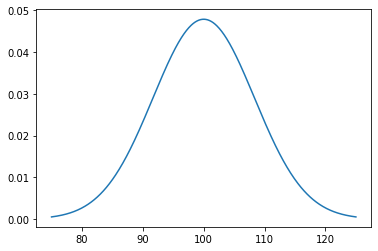

In [ ]:
import scipy.stats as stats
CurrentTokenPrice = 100
MaxPercentMovePerDay=0.25
DailyVolatility = MaxPercentMovePerDay / 3.0
PriceVol=DailyVolatility*CurrentTokenPrice
x = np.linspace(CurrentTokenPrice - 3*PriceVol, CurrentTokenPrice + 3*PriceVol, 500)
plt.plot(x, stats.norm.pdf(x, CurrentTokenPrice, PriceVol))

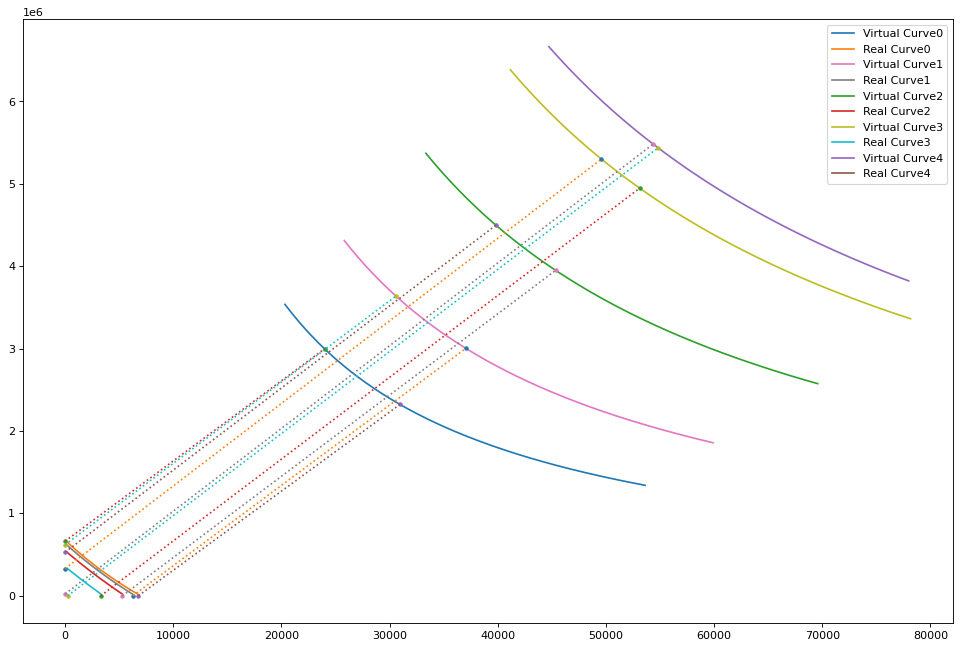

In [ ]:
#Lets split the range of x into 10 buckets of narrowing ranges.

Pas = np.linspace(CurrentTokenPrice - 3*PriceVol, CurrentTokenPrice - 0.1 * PriceVol, 5)
Pbs = np.linspace(CurrentTokenPrice + 0.1*PriceVol, CurrentTokenPrice + 3 * PriceVol, 5)[::-1]
figure(figsize=(15, 10), dpi=80)
Xreal = 10000

p = []
sum_p = 0
for i in range(0, 5):
  p.append(stats.norm.cdf(Pbs[i], CurrentTokenPrice, PriceVol) - stats.norm.cdf(Pas[i], CurrentTokenPrice, PriceVol))
  sum_p += p[-1]

for i in range(0, 5):
  K = K_from_Xreal(Pas[i], Pbs[i], Xreal * p[i] / sum_p, CurrentTokenPrice)
  plot_curves(Pas[i], Pbs[i], K, CurrentTokenPrice, i) # uniform capital
plt.legend()

Xreal 413.8682677455132
Yreal 58613.17322544867
Total Capital 100000.0
Amount of additional X when Y is depleted= 18535.11282824157
Amount of additional Y when X is depleted= 130876.63773442218
Value of total capital when Y is depleted= 1894.8981095987085
Amount of total capital when X is depleted= 189489.81095987087
4033.042910059721
4252.739606400362


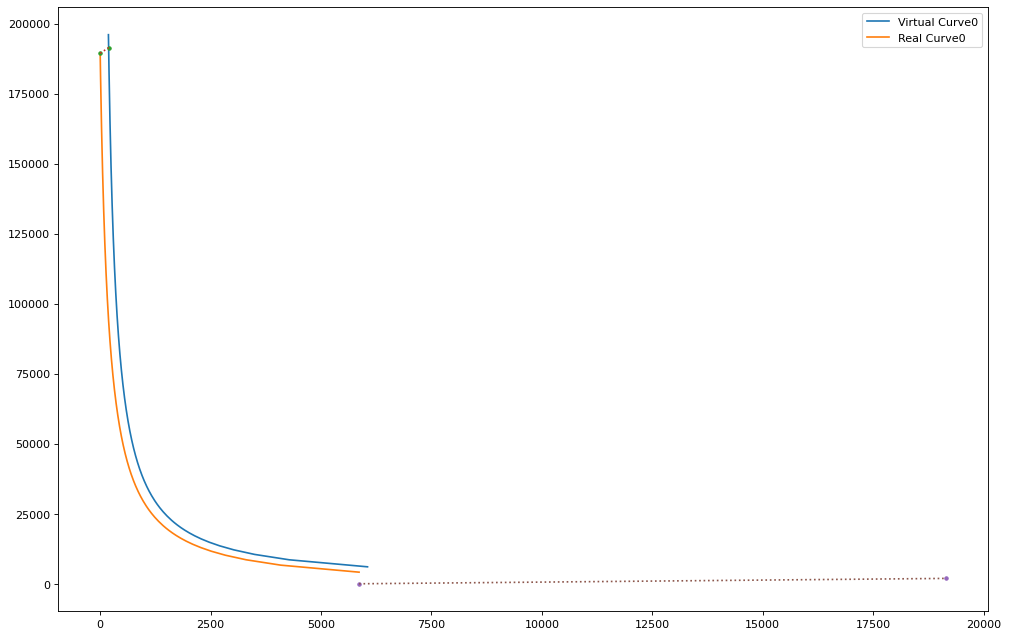

In [ ]:
token_price=100
Pa = 0.1
Pb = 1000
CapitalInY = 100000
figure(figsize=(15, 10), dpi=80)
plot_curve_from_amount(Pa, Pb, CapitalInY, token_price)
plt.legend()
K = K_from_Amount(Pa, Pb, CapitalInY, token_price)
L = np.sqrt(K)
prices = []
fees = []
v2fees = []
Ls = []

i = Pa / 1.3
L0 = L

X_sum = 0
Y_sum = 0
while i <= Pb:
  if len(prices) >= 2:
    L = np.sqrt(prices[-1] - prices[-2]) * Ls[-1] / np.sqrt(i - prices[-1])
    dY = np.sqrt(i - prices[-1]) * L
    [Xreal, Yreal,_,_] = get_XY_from_L(prices[-1], i, L, 0.5 * (i+prices[-1]))
    X_sum += np.max(Xreal, 0)
    Y_sum += np.max(Yreal, 0)
    fees.append(dY * 0.003)
    v2fees.append(np.sqrt(i - prices[-1]) * L0 * 0.003)
    prices.append(i)
  else:
    prices.append(i)
  Ls.append(L)
  i = i * 1.30
print(X_sum)
print(Y_sum)

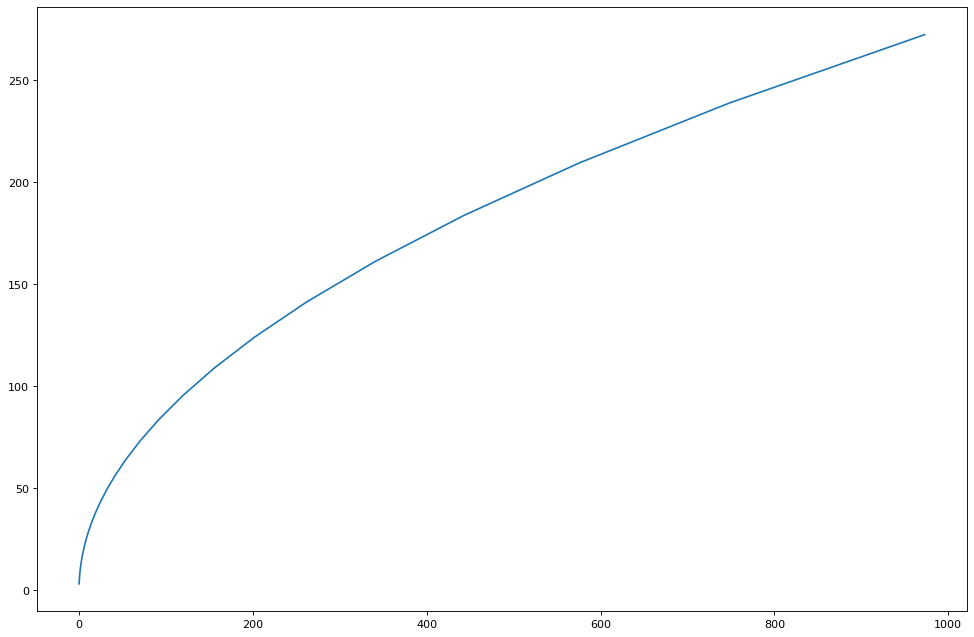

In [ ]:
figure(figsize=(15, 10), dpi=80)
plt.plot(prices[2:], v2fees, label="Fee vs Price")

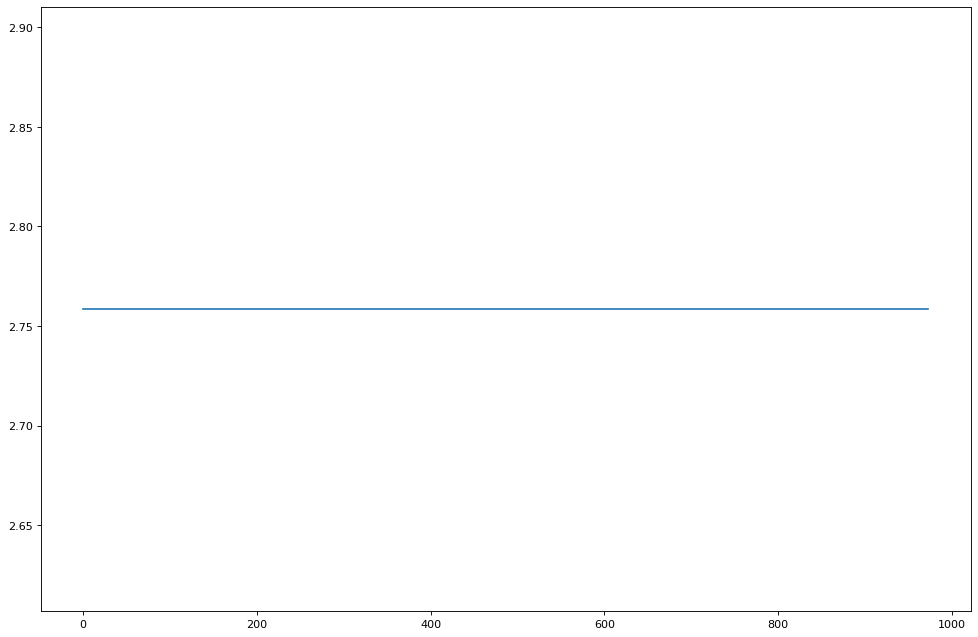

In [ ]:
figure(figsize=(15, 10), dpi=80)
plt.plot(prices[2:], fees, label="Fee vs Price")

Starting 385.1904158825971 61480.958411740314
83.33333333333334 585.5384188280476 324.72603384370336 43191.77165101786 125.00000000000001 41.66666666666667 91986.6398866885
69.44444444444446 754.4372535405184 273.75290949087685 30343.201969301634 104.16666666666669 34.72222222222223 82734.67790961542
57.87037037037038 896.8235810698106 230.78117441852714 21316.78953086272 86.80555555555557 28.93518518518519 73216.30232425455
48.22530864197532 1016.8591414204352 194.55482889678512 14975.529489696644 72.33796296296298 24.11265432098766 64013.87543011116
40.1877572016461 1118.0523950052936 164.01503087254684 10520.650080636122 60.281635802469154 20.09387860082305 55452.66826982778
33.48979766803842 1203.3610697111737 138.26914759537487 7390.995970816315 50.23469650205763 16.74489883401921 47691.3147170378
27.908164723365353 1275.2786108738449 116.56466529343936 5192.342775582558 41.862247085048025 13.954082361682676 40783.02831603437
23.256803936137793 1335.9070609665996 98.26719431823608

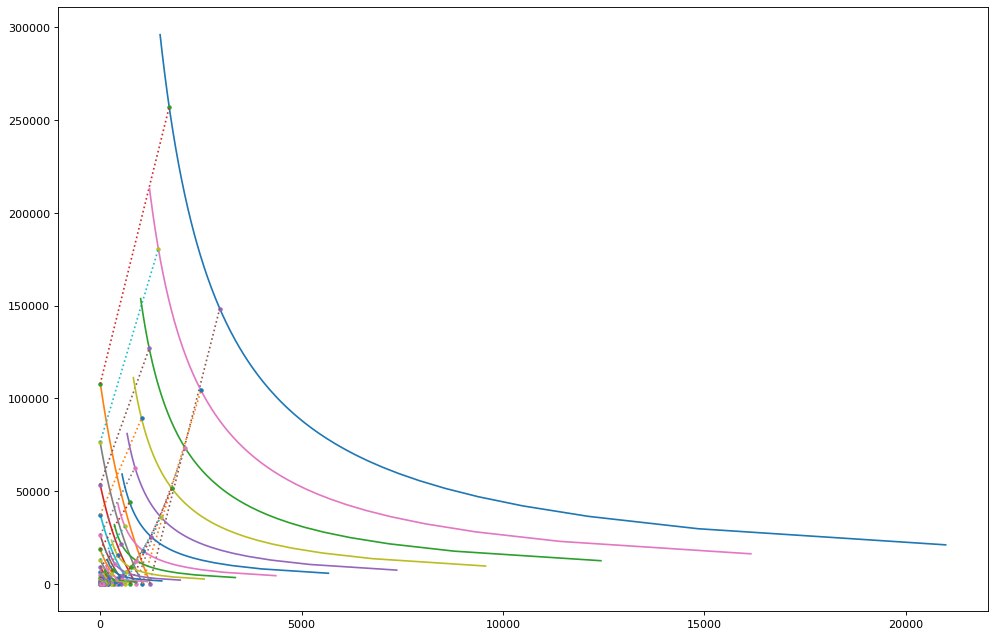

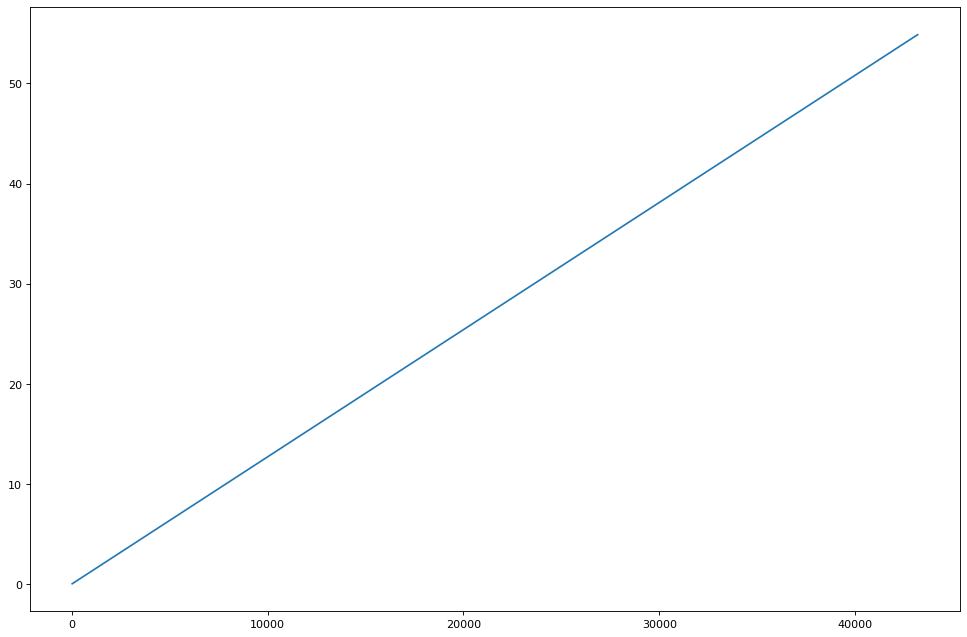

In [ ]:
tprice=100
CapitalInY = 100000
figure(figsize=(15, 10), dpi=80)
vol = 0.50
token_price = tprice
Pa = token_price - vol * token_price
Pb = token_price + vol * token_price

K = K_from_Amount(Pa, Pb, CapitalInY, token_price)
[Xreal, Yreal, _, _] = get_XY_from_L(Pa, Pb, np.sqrt(K), token_price)
plot_curves(Pa, Pb, K, token_price, 0)
print("Starting", Xreal, Yreal)
X = Xreal
Y = Yreal
fees = []
Ys = []
while Pa > 1:
  old_price = token_price
  token_price -= vol / 3 * token_price
  Pa = token_price - vol * token_price
  Pb = token_price + vol * token_price
  X += (1/np.sqrt(token_price) - 1 / np.sqrt(old_price)) * np.sqrt(K)
  dY = (np.sqrt(token_price) - np.sqrt(old_price)) * np.sqrt(K)
  Y += dY
  fees.append(abs(dY) * 0.003)
  Ys.append(Y)
  K = K_from_Yreal(Pa, Pb, Y, token_price)
  [Xnew, Ynew, _, _] = get_XY_from_L(Pa, Pb, np.sqrt(K), token_price)
  print(token_price, X, Xnew, Ynew, Pb, Pa, X * token_price + Ynew)
  plot_curves(Pa, Pb, K, token_price, 0, False)

figure(figsize=(15, 10), dpi=80)
plt.plot(Ys, fees)

266.8857356484168 39004.105519435805 143.0 77.0
165.86108130044295 26663.805808062258 157.3 84.7
103.077439576585 18227.7873239724 173.03 93.16999999999999
64.05938310759211 12460.79547382192 190.333 102.487
39.81088956983973 8518.391238645541 209.36629999999997 112.7357
24.741214346070336 5823.303130773322 230.30292999999998 124.00926999999999
15.37588569188712 3980.8994917996242 253.33322299999998 136.41019699999998
9.55562881849933 2721.4040567566917 278.66654529999994 150.0512167
5.93852243354759 1860.3936259600941 306.53319982999994 165.05633837
3.690604706774945 1271.7936665523193 337.18651981299996 181.561972207
2.293594619551289 869.4176908114623 370.9051717942999 199.7181694277
1.425396837861733 594.3472915265065 407.99568897372995 219.68998637046997
0.8858392534002846 406.3049402815727 448.79525787110293 241.65898500751695
0.5505212036543696 277.7562998112021 493.67478365821324 265.82488350826867
0.3421315938639111 189.87847411194628 543.0422620240346 292.4073718590955
0.2126

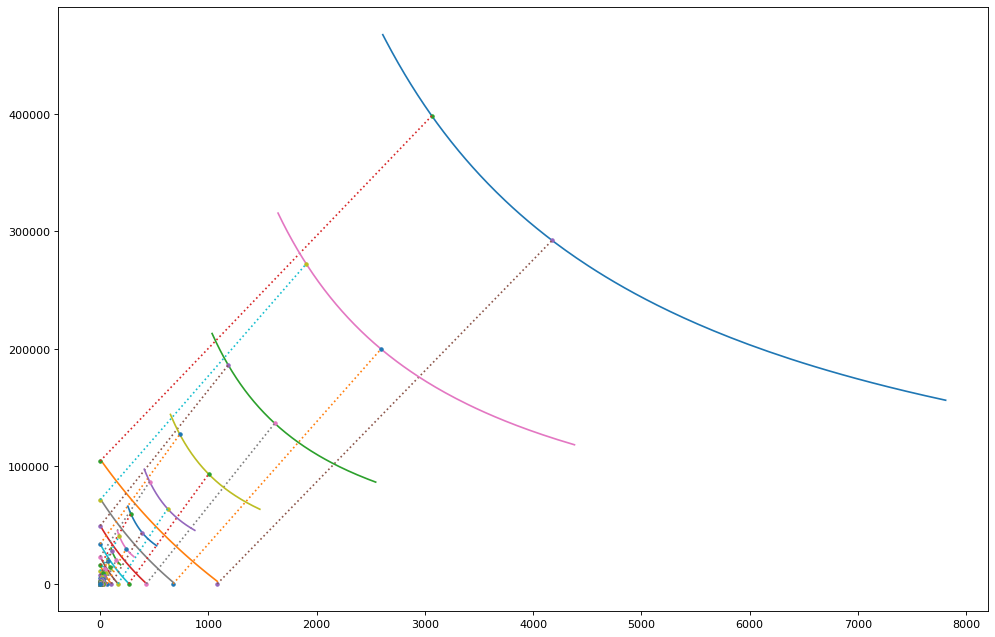

In [ ]:
tprice=100
CapitalInY = 100000
figure(figsize=(15, 10), dpi=80)
vol = 0.30
token_price = tprice
Pa = token_price - vol * token_price
Pb = token_price + vol * token_price

K = K_from_Amount(Pa, Pb, CapitalInY, token_price)
[Xreal, Yreal, _, _] = get_XY_from_L(Pa, Pb, np.sqrt(K), token_price)
plot_curves(Pa, Pb, K, token_price, 0)
X = Xreal
Y = Yreal

while Pb < 10000:
  old_price = token_price
  token_price += vol / 3 * token_price
  Pa = token_price - vol * token_price
  Pb = token_price + vol * token_price
  X += (1/np.sqrt(token_price) - 1 / np.sqrt(old_price)) * np.sqrt(K)
  K = K_from_Xreal(Pa, Pb, X, token_price)
  [Xnew, Ynew, _, _] = get_XY_from_L(Pa, Pb, np.sqrt(K), token_price)
  print(Xnew, Ynew, Pb, Pa)
  plot_curves(Pa, Pb, K, token_price, 0, False)